### Import basic libraries

In [1]:
import statistics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import scikitplot as skplt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm # interessante, leggere più documentazione
from IPython import display

## Funzioni utili per visualizzazione e classifiers evaluation

#### Display correlations among the attributes

In [2]:
def display_corr(df, corr_threshold = 0.8):
    print('Correlations')
    print("Att. A\tAtt. B\tCorr(A,B)")
    for i in range(0, len(df.columns)):
        for j in range(i+1, len(df.columns)):
            corr = df[df.columns[i]].corr(df[df.columns[j]])
            if  corr > corr_threshold:
                print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.4f}'.format(corr))

#### Plot the whole array of scatter plots

In [3]:
def corr_plot(label, label_source):
    nrows, ncols = 5, 6
    index = 0
    f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,30))
    for i in range(len(cs_num_columns)):
        for j in range(i+1,len(cs_num_columns)):
            axs[int(index/ncols)][index%ncols].scatter(test_set.iloc[:, i].values, test_set.iloc[:, j].values, c=label, s=25, cmap='cividis')
            axs[int(index/ncols)][index%ncols].set_title('Correlation of ' + cs.columns[i] + ' and ' + cs.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            axs[int(index/ncols)][index%ncols].set_xlabel(cs.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            axs[int(index/ncols)][index%ncols].set_ylabel(cs.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
            index = index + 1
    for i in range(int(index/ncols),nrows):
        for j in range(index%ncols,ncols):
            axs[i][j].remove()
    plt.suptitle(("Visualization of the " + label_source +  " with respect to different feature spaces"), fontsize=28, fontweight='bold')
    plt.show()

#### Print the classification scores

In [4]:
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['0', '1']))

#### Identify the misclassification of a classifier

In [5]:
def spot_errors(test_label, test_pred):
    spot_errors = []
    for i in range(len(test_label)):
        if test_label[i] != test_pred[i]:
            spot_errors.append('darkred')
        else:
            spot_errors.append('darkgray')
    return spot_errors

#### Compares the true labels with the one predicted by a classifier while displaying the misclassification

In [6]:
def classification_visualizer(test_set, test_label, test_pred, classifier_name):
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    a, b = 'I', 'Ep'
    errors = spot_errors(test_label, test_pred)
    labels = [test_label, test_pred, errors]
    titles = ['True Labels', 'Predicted Labels', 'Misclassifications']

    for i in range(3):
        axs[i].scatter(test_set[a], test_set[b], c=labels[i], s=20, cmap='cividis')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(a, fontdict={'fontsize': 'large'})
        axs[i].set_ylabel(b, fontdict={'fontsize': 'large'})

    plt.suptitle(('Visualization of the ' + classifier_name + ' classifier on the test set'),
                 fontsize=24, fontweight='bold')

    plt.show()

#### Plot the confusion matrix of a classifier

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#compute and plot the confusion matrix 
def plot_c_matrix(test_set, test_label, test_pred, classifier, classifier_name, axs=None):
    cm = confusion_matrix(test_label, test_pred)
    if axs:
        plot_confusion_matrix(classifier, test_set, test_label, ax=axs)
    else:
        plot_confusion_matrix(classifier, test_set, test_label)
    plt.title('Confusion matrix of ' + classifier_name)
    plt.show() 

#### Plot the decision boundary of a classifier

In [8]:
import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

#compute and plot the decision boundary

def plot_decision_boundary(train_set, train_label, classifier, classifier_name, axs=None):
    X = train_set#.values
    y = np.array(train_label)
    
    pca = PCA(n_components = 2)
    X = pca.fit_transform(X)
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(20,10))

    labels = [classifier_name]
    for clf, lab, grd in zip([classifier],
                         labels,
                         itertools.product([0, 1], repeat=2)):

        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        if axs:
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=axs)
        else:
            fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title('Decision boundary of ' + lab)

## Loading the data set
### Monk1

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [9]:
col_names = ['class', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'Id']
monk_train_1 = pd.read_csv('Monks/monks-1.train', sep=" ", names=col_names)
monk_train_1.set_index('Id', inplace=True)

In [10]:
monk_train_1['class']

Id
data_5      1
data_6      1
data_19     1
data_22     1
data_27     1
           ..
data_416    1
data_426    1
data_428    1
data_430    1
data_432    1
Name: class, Length: 124, dtype: int64

### Useful binary class visualization

<AxesSubplot:xlabel='class'>

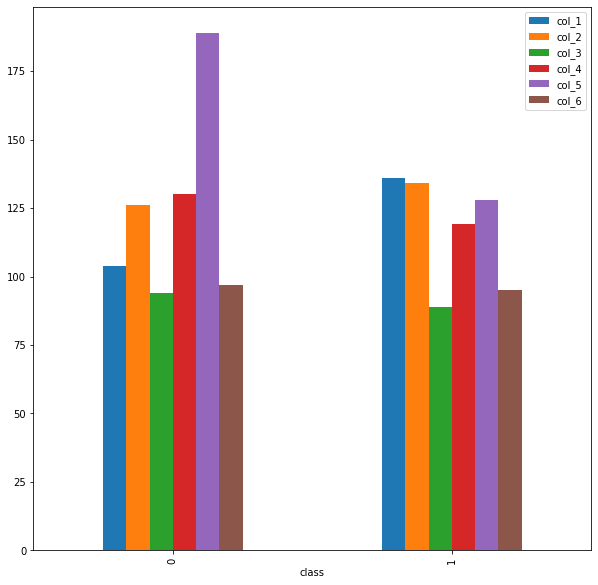

In [11]:
monk_train_1.groupby(monk_train_1['class']).sum().plot(kind="bar")

## Labels creation
Dropping the "class" column from the Monk dataset: this represents the target *y*.

In [12]:
labels = monk_train_1['class']

In [13]:
monk_train_1.drop(columns=['class'], inplace=True)
# labels = monk_train_1.pop('class')

In [14]:
labels

Id
data_5      1
data_6      1
data_19     1
data_22     1
data_27     1
           ..
data_416    1
data_426    1
data_428    1
data_430    1
data_432    1
Name: class, Length: 124, dtype: int64

In [15]:
labels = pd.Series(labels).to_numpy() # from pd Series into numpy array

In [16]:
labels.shape

(124,)

In [17]:
labels = np.expand_dims(labels, 1) # add a flat dimension

⬆ [documentation here](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html)

In [18]:
labels.shape

(124, 1)

In [19]:
monk_train_1

,col_1,col_2,col_3,col_4,col_5,col_6
Id,,,,,,
data_5,1,1,1,1,3,1
data_6,1,1,1,1,3,2
data_19,1,1,1,3,2,1
data_22,1,1,1,3,3,2
data_27,1,1,2,1,2,1
...,...,...,...,...,...,...
data_416,3,3,2,1,4,2
data_426,3,3,2,3,1,2
data_428,3,3,2,3,2,2


## Types of Attributes and basic checks

Check the data integrity, that is whether there are any empty cells or corrupted data. 
We will use for this purpose the Pandas function **info()**, which checks if there is any 
null value in any column. This function also checks data type for each column, as well as 
number of each data types and number of observations (rows).

In [20]:
monk_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, data_5 to data_432
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_1   124 non-null    int64
 1   col_2   124 non-null    int64
 2   col_3   124 non-null    int64
 3   col_4   124 non-null    int64
 4   col_5   124 non-null    int64
 5   col_6   124 non-null    int64
dtypes: int64(6)
memory usage: 11.8+ KB


In [21]:
monk_train_1.dtypes #return the type of each attribute

col_1    int64
col_2    int64
col_3    int64
col_4    int64
col_5    int64
col_6    int64
dtype: object

## One-hot Encoding

Documentation here: [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

N.B.: attenzione alle dimensioni dopo l'encoding!

In [22]:
# 1-hot encoding (and transform dataframe to numpy array)
encoder = OneHotEncoder()

In [23]:
encoder.fit(monk_train_1)

OneHotEncoder()

In [24]:
encoder.categories_

[array([1, 2, 3], dtype=int64),
 array([1, 2, 3], dtype=int64),
 array([1, 2], dtype=int64),
 array([1, 2, 3], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2], dtype=int64)]

In [25]:
monk_dataset = encoder.transform(monk_train_1).toarray()

In [26]:
monk_dataset

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [27]:
# importante: controllo dimensioni
monk_dataset.shape

(124, 17)

## Splitting
N.B.: lo splitting attuale si trova dentro al construttore della NN, poi portare questo modulo fuori.

- Training & validation set
- Input and Output labels (supervised learning)

In [28]:
# Format:
# Training set: id inputs target_x target_y (last 2 columns) # to split in TR and VL
# Blind Test set: id inputs

In [29]:
'''
train_size = int(len(ds) * 0.80)
val_size = len(ds) - train_size
print(train_size)
print(val_size)'''

'\ntrain_size = int(len(ds) * 0.80)\nval_size = len(ds) - train_size\nprint(train_size)\nprint(val_size)'

In [30]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(monk_dataset, labels, test_size=0.30)

In [31]:
'''from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(ds, test_size=0.20)'''

'from sklearn.model_selection import train_test_split\ntrain_set, val_set = train_test_split(ds, test_size=0.20)'

In [32]:
train_X.shape

(86, 17)

In [33]:
train_y.shape

(86, 1)

In [34]:
val_X.shape

(38, 17)

In [35]:
val_y.shape

(38, 1)

In [36]:
print("Input TR\n\n", train_X)

Input TR

 [[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]]


In [37]:
print("Output TR\n\n", train_y)

Output TR

 [[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


# NN From scratch

Fonte: [ahmedbesbes/Neural-Network-from-scratch](https://github.com/ahmedbesbes/Neural-Network-from-scratch)

### Activation, loss e altre funzioni:

In [38]:
def activation(z, derivative=False):
    """
    Sigmoid activation function:
    It handles two modes: normal and derivative mode.
    Applies a pointwize operation on vectors
    
    Parameters:
    ---
    z: pre-activation vector at layer l
        shape (n[l], batch_size)
    Returns: 
    pontwize activation on each element of the input z
    """
    if derivative:
        return activation(z) * (1 - activation(z))
    else:
        return 1 / (1 + np.exp(-z))

def cost_function(y_true, y_pred):
    """
    Computes the Mean Square Error between a ground truth vector and a prediction vector
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost: a scalar value representing the loss
    """
    n = y_pred.shape[1]
    cost = (1./(2*n)) * np.sum((y_true - y_pred) ** 2)
    return cost

def cost_function_prime(y_true, y_pred):
    """
    Computes the derivative of the loss function w.r.t the activation of the output layer
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost_prime: derivative of the loss w.r.t. the activation of the output
    shape: (n[L], batch_size)    
    """
    cost_prime = y_pred - y_true
    return cost_prime

### Costruttore rete:

In [39]:
class NeuralNetwork(object):     
    '''
    This is a custom neural netwok package built from scratch with numpy. 
    It allows training using SGD, inference and live plotting of the decision boundary.
    This code is not optimized and should not be used with real-world examples.
    It's written for educational purposes only.
    The Neural Network as well as its parameters and training method and procedure will 
    reside in this class.
    Parameters
    ---
    size: list of number of neurons per layer
    Examples
    ---
    >>> import NeuralNetwork
    >>> nn = NeuralNetword([2, 3, 4, 1])
    
    This means :
    1 input layer with 2 neurons
    1 hidden layer with 3 neurons
    1 hidden layer with 4 neurons
    1 output layer with 1 neuron
    
    '''

    def __init__(self, size, seed=42):
        '''
        Instantiate the weights and biases of the network
        weights and biases are attributes of the NeuralNetwork class
        They are updated during the training
        '''
        self.seed = seed
        np.random.seed(self.seed)
        self.size = size
        self.weights = [np.random.randn(self.size[i], self.size[i-1]) * np.sqrt(1 / self.size[i-1]) for i in range(1, len(self.size))]
        self.biases = [np.random.rand(n, 1) for n in self.size[1:]]

    def forward(self, input):
        '''
        Perform a feed forward computation 
        Parameters
        ---
        input: data to be fed to the network with
        shape: (input_shape, batch_size)
        Returns
        ---
        a: ouptut activation (output_shape, batch_size)
        pre_activations: list of pre-activations per layer
        each of shape (n[l], batch_size), where n[l] is the number 
        of neuron at layer l
        activations: list of activations per layer
        each of shape (n[l], batch_size), where n[l] is the number 
        of neuron at layer l
        '''
        a = input
        pre_activations = []
        activations = [a]
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b
            a  = activation(z)
            pre_activations.append(z)
            activations.append(a)
        return a, pre_activations, activations

    def compute_deltas(self, pre_activations, y_true, y_pred):
        """
        Computes a list containing the values of delta for each layer using 
        a recursion
        Parameters:
        ---
        pre_activations: list of of pre-activations. each corresponding to a layer
        y_true: ground truth values of the labels
        y_pred: prediction values of the labels
        Returns:
        ---
        deltas: a list of deltas per layer
        
        """
        delta_L = cost_function_prime(y_true, y_pred) * activation(pre_activations[-1], derivative=True)
        deltas = [0] * (len(self.size) - 1)
        deltas[-1] = delta_L
        for l in range(len(deltas) - 2, -1, -1):
            delta = np.dot(self.weights[l + 1].transpose(), deltas[l + 1]) * activation(pre_activations[l], derivative=True) 
            deltas[l] = delta
        return deltas

    def backpropagate(self, deltas, pre_activations, activations):
        """
        Applies back-propagation and computes the gradient of the loss
        w.r.t the weights and biases of the network
        Parameters:
        ---
        deltas: list of deltas computed by compute_deltas
        pre_activations: a list of pre-activations per layer
        activations: a list of activations per layer
        Returns:
        ---
        dW: list of gradients w.r.t. the weight matrices of the network
        db: list of gradients w.r.t. the biases (vectors) of the network
    
        """
        dW = []
        db = []
        deltas = [0] + deltas
        for l in range(1, len(self.size)):
            dW_l = np.dot(deltas[l], activations[l-1].transpose()) 
            db_l = deltas[l]
            dW.append(dW_l)
            db.append(np.expand_dims(db_l.mean(axis=1), 1))
        return dW, db

    def train(self, X, y, batch_size, epochs, learning_rate, validation_split=0.2, print_every=10, tqdm_=True, plot_every=None):
        """
        Trains the network using the gradients computed by back-propagation
        Splits the data in train and validation splits
        Processes the training data by batches and trains the network using batch gradient descent
        Parameters:
        ---
        X: input data
        y: input labels
        batch_size: number of data points to process in each batch
        epochs: number of epochs for the training
        learning_rate: value of the learning rate
        validation_split: percentage of the data for validation
        print_every: the number of epochs by which the network logs the loss and accuracy metrics for train and validations splits
        tqdm_: use tqdm progress-bar
        plot_every: the number of epochs by which the network plots the decision boundary
    
        Returns:
        ---
        history: dictionary of train and validation metrics per epoch
            train_acc: train accuracy
            test_acc: validation accuracy
            train_loss: train loss
            test_loss: validation loss
        This history is used to plot the performance of the model
        """
        history_train_losses = []
        history_train_accuracies = []
        history_test_losses = []
        history_test_accuracies = []

        x_train, x_test, y_train, y_test = train_test_split(X.T, y.T, test_size=validation_split, )
        x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T 

        if tqdm_:
            epoch_iterator = tqdm(range(epochs))
        else:
            epoch_iterator = range(epochs)

        for e in epoch_iterator:
            if x_train.shape[1] % batch_size == 0:
                n_batches = int(x_train.shape[1] / batch_size)
            else:
                n_batches = int(x_train.shape[1] / batch_size ) - 1

            x_train, y_train = shuffle(x_train.T, y_train.T)
            x_train, y_train = x_train.T, y_train.T

            batches_x = [x_train[:, batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]
            batches_y = [y_train[:, batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]

            train_losses = []
            train_accuracies = []
            
            test_losses = []
            test_accuracies = []

            dw_per_epoch = [np.zeros(w.shape) for w in self.weights]
            db_per_epoch = [np.zeros(b.shape) for b in self.biases] 
            
            for batch_x, batch_y in zip(batches_x, batches_y):
                batch_y_pred, pre_activations, activations = self.forward(batch_x)
                deltas = self.compute_deltas(pre_activations, batch_y, batch_y_pred)
                dW, db = self.backpropagate(deltas, pre_activations, activations)
                for i, (dw_i, db_i) in enumerate(zip(dW, db)):
                    dw_per_epoch[i] += dw_i / batch_size
                    db_per_epoch[i] += db_i / batch_size

                batch_y_train_pred = self.predict(batch_x)

                train_loss = cost_function(batch_y, batch_y_train_pred)
                train_losses.append(train_loss)
                train_accuracy = accuracy_score(batch_y.T, batch_y_train_pred.T)
                train_accuracies.append(train_accuracy)

                batch_y_test_pred = self.predict(x_test)

                test_loss = cost_function(y_test, batch_y_test_pred)
                test_losses.append(test_loss)
                test_accuracy = accuracy_score(y_test.T, batch_y_test_pred.T)
                test_accuracies.append(test_accuracy)


            # weight update
            for i, (dw_epoch, db_epoch) in enumerate(zip(dw_per_epoch, db_per_epoch)):
                self.weights[i] = self.weights[i] - learning_rate * dw_epoch
                self.biases[i] = self.biases[i] - learning_rate * db_epoch

            history_train_losses.append(np.mean(train_losses))
            history_train_accuracies.append(np.mean(train_accuracies))
            
            history_test_losses.append(np.mean(test_losses))
            history_test_accuracies.append(np.mean(test_accuracies))


            if not plot_every:
                if e % print_every == 0:    
                    print('Epoch {} / {} | train loss: {} | train accuracy: {} | val loss : {} | val accuracy : {} '.format(
                        e, epochs, np.round(np.mean(train_losses), 3), np.round(np.mean(train_accuracies), 3), 
                        np.round(np.mean(test_losses), 3),  np.round(np.mean(test_accuracies), 3)))
            else:
                if e % plot_every == 0:
                    self.plot_decision_regions(x_train, y_train, e, 
                                                np.round(np.mean(train_losses), 4), 
                                                np.round(np.mean(test_losses), 4),
                                                np.round(np.mean(train_accuracies), 4), 
                                                np.round(np.mean(test_accuracies), 4), 
                                                )
                    plt.show()                    
                    display.display(plt.gcf())
                    display.clear_output(wait=True)

        history = {'epochs': epochs,
                   'train_loss': history_train_losses, 
                   'train_acc': history_train_accuracies,
                   'test_loss': history_test_losses,
                   'test_acc': history_test_accuracies
                   }
        return history

    def predict(self, a):
        '''
        Use the current state of the network to make predictions
        Parameters:
        ---
        a: input data, shape: (input_shape, batch_size)
        Returns:
        ---
        predictions: vector of output predictions
        '''
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b
            a = activation(z)
        predictions = (a > 0.5).astype(int)
        return predictions

In [40]:
nn = NeuralNetwork([17,1,1])

In [41]:
monk_dataset.T.shape

(17, 124)

In [42]:
labels.T.shape

(1, 124)

In [43]:
mynet = nn.train(X=monk_dataset.T, y=labels.T, batch_size=1, epochs=200, learning_rate=0.3, validation_split=0.3, print_every=10, tqdm_=True, plot_every=None)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

Epoch 0 / 200 | train loss: 0.244 | train accuracy: 0.512 | val loss : 0.263 | val accuracy : 0.474 


  8%|██████▍                                                                          | 16/200 [00:00<00:06, 28.15it/s]

Epoch 10 / 200 | train loss: 0.244 | train accuracy: 0.512 | val loss : 0.263 | val accuracy : 0.474 


 12%|██████████▏                                                                      | 25/200 [00:00<00:06, 28.76it/s]

Epoch 20 / 200 | train loss: 0.244 | train accuracy: 0.512 | val loss : 0.263 | val accuracy : 0.474 


 18%|██████████████▏                                                                  | 35/200 [00:01<00:05, 29.15it/s]

Epoch 30 / 200 | train loss: 0.122 | train accuracy: 0.756 | val loss : 0.132 | val accuracy : 0.737 


 22%|█████████████████▊                                                               | 44/200 [00:01<00:05, 29.01it/s]

Epoch 40 / 200 | train loss: 0.128 | train accuracy: 0.744 | val loss : 0.118 | val accuracy : 0.763 


 28%|██████████████████████▋                                                          | 56/200 [00:01<00:04, 29.00it/s]

Epoch 50 / 200 | train loss: 0.11 | train accuracy: 0.779 | val loss : 0.053 | val accuracy : 0.895 


 32%|██████████████████████████▎                                                      | 65/200 [00:02<00:04, 28.93it/s]

Epoch 60 / 200 | train loss: 0.093 | train accuracy: 0.814 | val loss : 0.039 | val accuracy : 0.921 


 38%|███████████████████████████████▏                                                 | 77/200 [00:02<00:04, 29.34it/s]

Epoch 70 / 200 | train loss: 0.093 | train accuracy: 0.814 | val loss : 0.053 | val accuracy : 0.895 


 43%|██████████████████████████████████▊                                              | 86/200 [00:02<00:03, 29.17it/s]

Epoch 80 / 200 | train loss: 0.093 | train accuracy: 0.814 | val loss : 0.053 | val accuracy : 0.895 


 48%|██████████████████████████████████████▉                                          | 96/200 [00:03<00:03, 29.29it/s]

Epoch 90 / 200 | train loss: 0.093 | train accuracy: 0.814 | val loss : 0.053 | val accuracy : 0.895 


 52%|██████████████████████████████████████████                                      | 105/200 [00:03<00:03, 26.39it/s]

Epoch 100 / 200 | train loss: 0.093 | train accuracy: 0.814 | val loss : 0.066 | val accuracy : 0.868 


 57%|██████████████████████████████████████████████                                  | 115/200 [00:04<00:03, 26.16it/s]

Epoch 110 / 200 | train loss: 0.087 | train accuracy: 0.826 | val loss : 0.066 | val accuracy : 0.868 


 63%|██████████████████████████████████████████████████▍                             | 126/200 [00:04<00:02, 28.71it/s]

Epoch 120 / 200 | train loss: 0.087 | train accuracy: 0.826 | val loss : 0.066 | val accuracy : 0.868 


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [00:04<00:02, 29.32it/s]

Epoch 130 / 200 | train loss: 0.087 | train accuracy: 0.826 | val loss : 0.066 | val accuracy : 0.868 


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [00:05<00:01, 29.78it/s]

Epoch 140 / 200 | train loss: 0.087 | train accuracy: 0.826 | val loss : 0.066 | val accuracy : 0.868 


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [00:05<00:01, 29.71it/s]

Epoch 150 / 200 | train loss: 0.087 | train accuracy: 0.826 | val loss : 0.066 | val accuracy : 0.868 


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [00:05<00:01, 29.95it/s]

Epoch 160 / 200 | train loss: 0.081 | train accuracy: 0.837 | val loss : 0.066 | val accuracy : 0.868 


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [00:06<00:00, 29.72it/s]

Epoch 170 / 200 | train loss: 0.081 | train accuracy: 0.837 | val loss : 0.066 | val accuracy : 0.868 


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [00:06<00:00, 29.07it/s]

Epoch 180 / 200 | train loss: 0.081 | train accuracy: 0.837 | val loss : 0.066 | val accuracy : 0.868 


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [00:06<00:00, 29.12it/s]

Epoch 190 / 200 | train loss: 0.087 | train accuracy: 0.826 | val loss : 0.066 | val accuracy : 0.868 


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 28.80it/s]


⬆ [documentation for progress bar here](https://pypi.org/project/tqdm/)

In [44]:
def plot_history(history):
    n = history['epochs']
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    n = 4000
    plt.plot(range(history['epochs'])[:n], history['train_loss'][:n], label='train_loss')
    plt.plot(range(history['epochs'])[:n], history['test_loss'][:n], label='test_loss')
    plt.title('train & test loss')
    plt.grid(1)
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(history['epochs'])[:n], history['train_acc'][:n], label='train_acc')
    plt.plot(range(history['epochs'])[:n], history['test_acc'][:n], label='test_acc')
    plt.title('train & test accuracy')
    plt.grid(1)
    plt.xlabel('epochs')
    plt.legend()

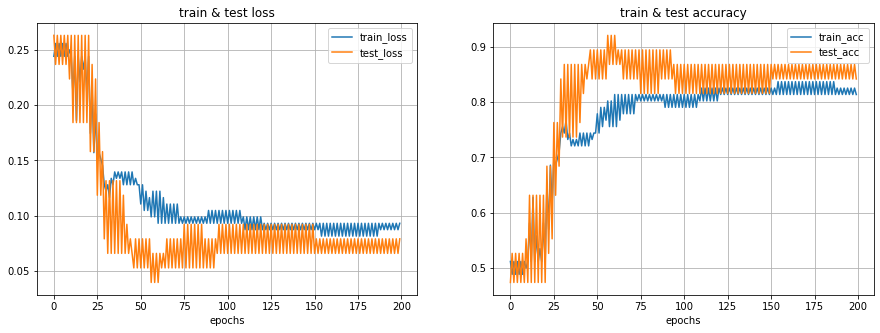

In [45]:
plot_history(mynet)